In [1]:
#required class are imported
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
print('import complete')


import complete


In [17]:
##data loaded
df=pd.read_csv(r'G:\______GL_________\tips (1).csv')
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
##Q1 solutions
cat_col=df.select_dtypes(include=['object','category']).columns.to_list()
print('categorical columns   :',cat_col)

num_col=df.select_dtypes(include=['number']).columns.to_list()
print('numerical columns     :',num_col)

categorical columns   : ['sex', 'smoker', 'day', 'time']
numerical columns     : ['total_bill', 'tip', 'size']


In [30]:
##q2 solutions
avg_bill=df.groupby('day')['total_bill'].mean()
print('average bill    :',avg_bill)

average bill    : day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


In [32]:
##q3 solutions
generous_gender=df.groupby('sex')['total_bill'].mean()
print('generous gender     :',generous_gender)

generous gender     : sex
Female    18.056897
Male      20.744076
Name: total_bill, dtype: float64


In [54]:
##q4 solutions
print('more customer on dinner or lunch :')
df.groupby('time')['size'].count()



more customer on dinner or lunch :


time
Dinner    176
Lunch      68
Name: size, dtype: int64

In [48]:
##q5 solutions
print('stastical summary on tips')
df['tip'].describe()


stastical summary on tips


count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [56]:
##q6 solutions
df.day.mode()

0    Sat
Name: day, dtype: object

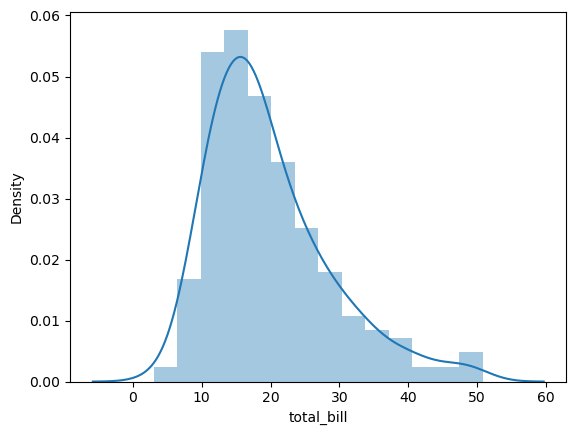

In [62]:
##q7 solutions
sns.distplot(df['total_bill'])
plt.show()


In [64]:
##q8 solutions
df[['tip','total_bill']].corr

<bound method DataFrame.corr of       tip  total_bill
0    1.01       16.99
1    1.66       10.34
2    3.50       21.01
3    3.31       23.68
4    3.61       24.59
..    ...         ...
239  5.92       29.03
240  2.00       27.18
241  2.00       22.67
242  1.75       17.82
243  3.00       18.78

[244 rows x 2 columns]>

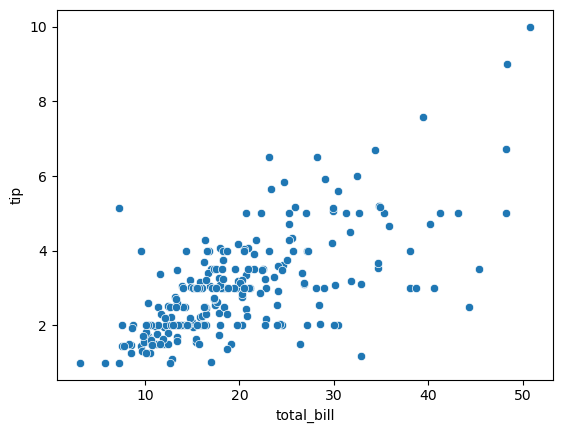

In [68]:
sns.scatterplot(x='total_bill',y='tip',data=df)
plt.show()

In [ ]:
### observation on Q8:: tips increased with total_bill increased

In [70]:
#q9 solutions
sex_counts=df['sex'].value_counts()
sex_percentile=(sex_counts/sex_counts.sum())*100
print('Sex percentage   :',sex_percentile)

Sex percentage   : sex
Male      64.344262
Female    35.655738
Name: count, dtype: float64


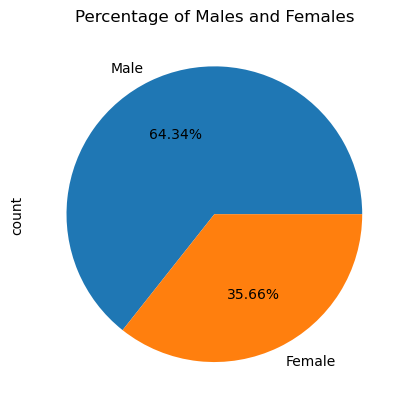

In [88]:
sex_percentile.plot(kind='pie',autopct='%0.2f%%')
plt.title('Percentage of Males and Females')
plt.xticks(rotation=0)
plt.show()

In [86]:
##q10 solutions
print('gender wise smoker')
df.groupby('sex')['smoker'].value_counts()

gender wise smoker


sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: count, dtype: int64

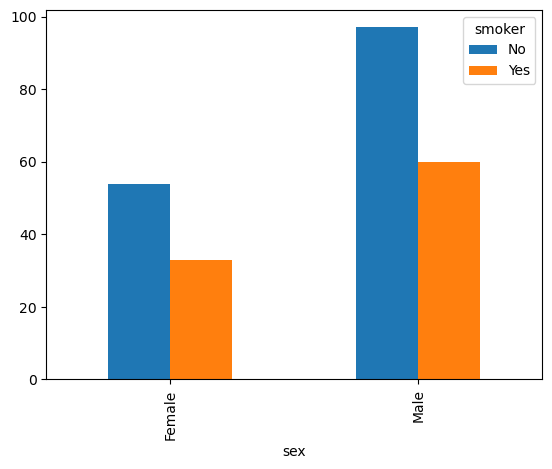

In [94]:
pd.crosstab(df['sex'],df['smoker']).plot(kind='bar')
plt.show()

In [98]:
##q11 solutions
print('average tip on different days')
df.groupby('day')['tip'].mean()


average tip on different days


day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

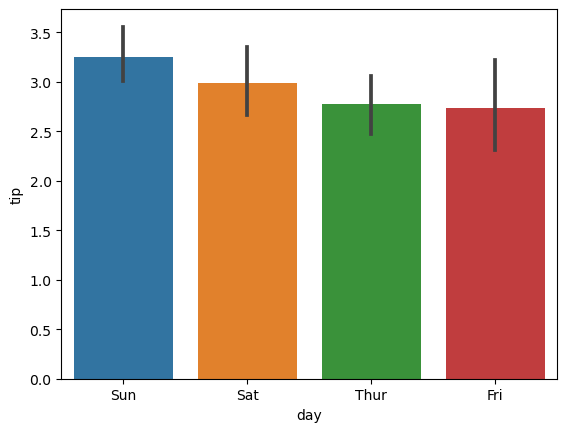

In [100]:
## on bar diagram
sns.barplot(x='day',y='tip',data=df)
plt.show()

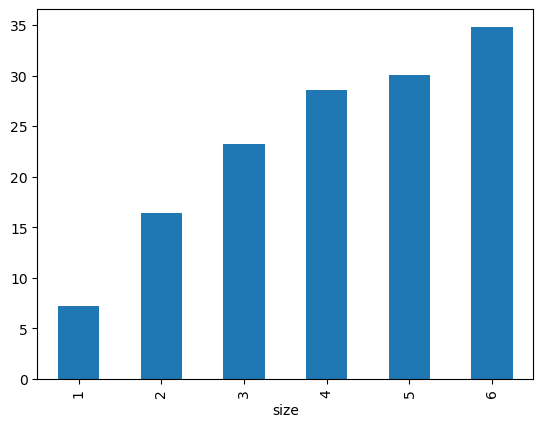

In [129]:
##Q12 Solutions
df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.show()


In [133]:
##q12 overview::: with the increase od size the total_bill is also increase

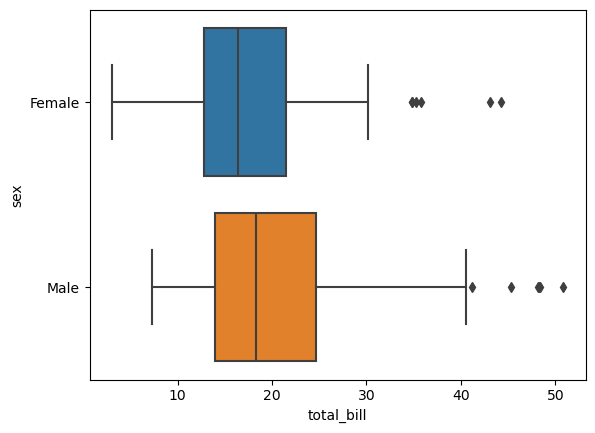

In [135]:
##q13 solution
sns.boxplot(x='total_bill',y='sex',data=df)
plt.show()

In [137]:
##q14 solutions
df.groupby(['time','day'])['total_bill'].max()


time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64

In [144]:
##q15 solutions
##missing value percentage
mis_val_percent = 100 * df.isnull().sum() / len(df)
print('Missing Values Percentage')
print(mis_val_percent)

Missing Values Percentage
total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64


In [158]:
##q16 solutions
df1=pd.read_csv(r'G:\______GL_________\tips (1).csv')
dup=len(df1[df1.duplicated()])
print('count of duplicate value, if there is any ::::',dup)

count of duplicate value, if there is any :::: 1


In [160]:
##drop duplicates 
drp_dup=df1.drop_duplicates(inplace=True)
print('duplicated values drops',drp_dup)


duplicated values drops None


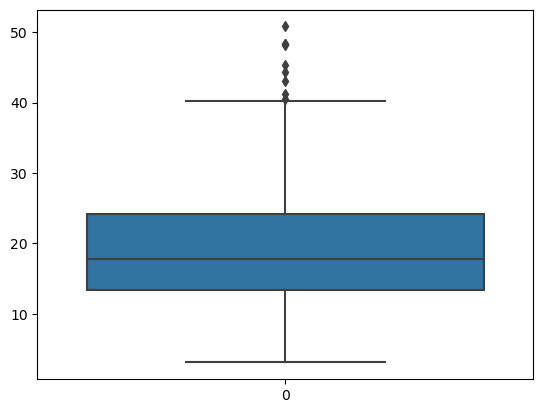

In [162]:
##q17 solutions
sns.boxplot(df['total_bill'])
plt.show()

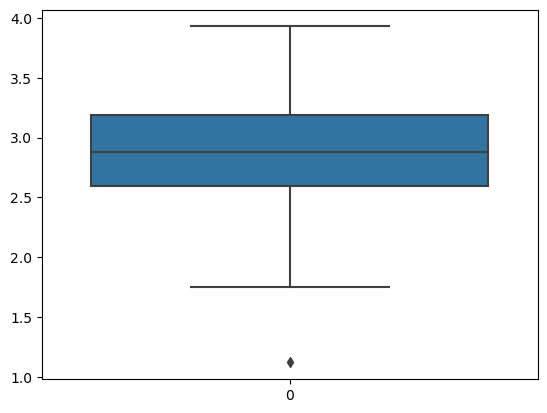

In [164]:
### outliers treatment
df['total_bill_trns']=np.log(df['total_bill'])
sns.boxplot(df['total_bill_trns'])
plt.show()
                             

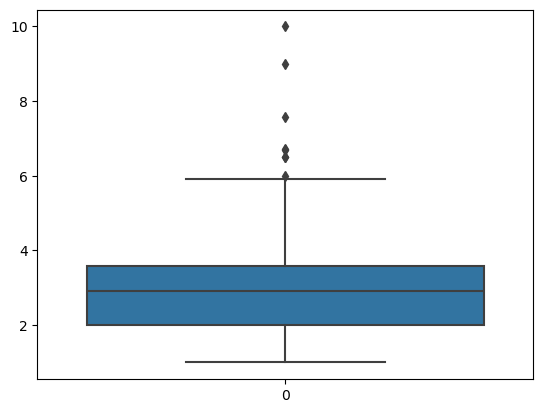

In [166]:
##q18 solutions
## finding outliner if any
sns.boxplot(df['tip'])
plt.show()

In [172]:
## removing outliers using IQR
Q1=df['tip'].quantile(0.25)
Q2=df['tip'].quantile(0.50)
Q3=df['tip'].quantile(0.75)
IQR=Q3-Q1
lower_whisker=Q1-(1.5*IQR)
upper_whisker=Q3+(1.5*IQR)


In [174]:
df_out=df.loc[(df['tip']<upper_whisker) & (df['tip']>lower_whisker)]

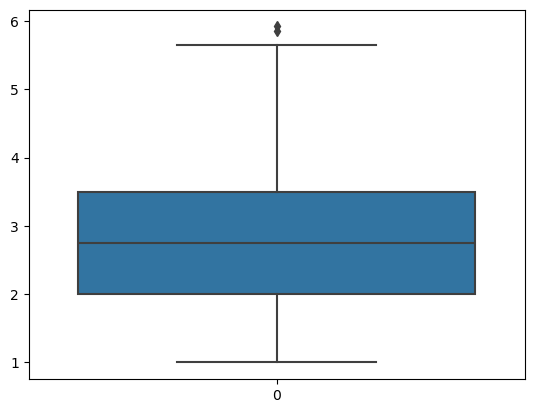

In [178]:
sns.boxplot(df_out['tip'])
plt.show()

In [180]:
##q19 solutions
df=pd.get_dummies(df,drop_first=True)
df.sample(5)

,total_bill,tip,size,total_bill_trns,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
48,28.55,2.05,3,3.351657,True,False,False,True,False,False
223,15.98,3.00,3,2.771338,False,False,False,False,False,True
90,28.97,3.00,2,3.366261,True,True,False,False,False,False
15,21.58,3.92,2,3.071767,True,False,False,True,False,False
69,15.01,2.09,2,2.708717,True,True,True,False,False,False


In [184]:
#q20 solutions
max_val=df['total_bill'].max()
min_val=df['total_bill'].min()
range_val=max_val-min_val
print('range value   :',range_val)

range value   : 47.74


In [186]:
mm=MinMaxScaler() ## variable assign to MinMaxScaler


In [192]:
## normalization
df['totalbill_mm']=mm.fit_transform(df[['total_bill']])

In [194]:
mm_max_val=df['totalbill_mm'].max()
mm_min_val=df['totalbill_mm'].min()
mm_range_val=mm_max_val-mm_min_val
print('new range value    :',mm_range_val)

new range value    : 0.9999999999999999


In [196]:
##q21 solutions
tips_df=pd.read_csv(r'G:\______GL_________\tips (1).csv')
tips_df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [198]:
tips_df=pd.get_dummies(tips_df,drop_first=True)
tips_df.head(2)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False


In [200]:
##assigning the values in target values
X=tips_df.drop('tip',axis=1)
y=tips_df['tip']

In [204]:
##q22 solutions
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

mm=MinMaxScaler()

X_train.iloc[:,:2]=mm.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2]=mm.fit_transform(X_test.iloc[:,:2])


(170, 8) (74, 8)
(170,) (74,)


In [206]:
###q23 solutions

lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [208]:
prdct=lr.predict(X_test)

In [212]:
print('r2 score :',r2_score(y_test, prdct))

r2 score : 0.10076307812507423
